In [64]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for waffle charts
import seaborn as sns

In [27]:
df_ori = pd.read_excel('Canada.xlsx', sheet_name = 'Canada by Citizenship', skiprows=range(20), skipfooter=2)

#duplicate data ori
df = df_ori.copy()
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [28]:
df.shape

(195, 43)

clean up dataset

In [29]:
# remove unnecessary columns
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [30]:
# rename columns
df.rename(columns = {'OdName' : 'Country', 'AreaName' : 'Continent', 'RegName' : 'Region'}, inplace=True)

In [31]:
# make all column labels of type string for consistency
df.columns = list(map(str, df.columns))

In [32]:
# set country name as index - to quickly look up countries using .loc method
df.set_index('Country', inplace=True)

In [33]:
# add total column
df['Total'] = df.iloc[:,4:].sum(axis=1)
# df.Total = df.iloc[:,4:].sum(axis=1)

In [34]:
# years for plotting
years = list(map(str, range(1980, 2014)))

In [35]:
mpl.style.use('ggplot') # optional for ggplot - like style

#### Waffle charts

waffle chart biasanya dibuat utk menampilkan progress menuju tujuan  

waffle charts tdk built in dlm library visualisasi py, jd hrs buat dr awal

In [36]:
df_dsn= df.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3629
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2211
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5585


In [37]:
# step 1 : menetukan proportion for each category proportionate w respect to the total
total_val = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_val) for value in df_dsn['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.317636761487965
Norway: 0.1935229759299781
Sweden: 0.4888402625820569


In [38]:
# step 2: menentukan ukuran keseluruhan dr waffle chart
width = 40 
height = 10

total_num_tiles = width * height 

print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


In [39]:
# step 3: menggunakan proporsi tiap cat utk menentukan jumlah ubin masing2 kategori
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions] 

#print out number of tiles per cat
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 127
Norway: 77
Sweden: 196


In [40]:
# step 4: membuat matriks yg menyerupai waffle & mengisinya

# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0 
tile_index = 0

#populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index +=1

        # if the num. of tiles populated for the current cat = corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ... proceed to the next category
            category_index += 1

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
print('Waffle chart populated!')



Waffle chart populated!


In [41]:
waffle_chart

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

<Figure size 640x480 with 0 Axes>

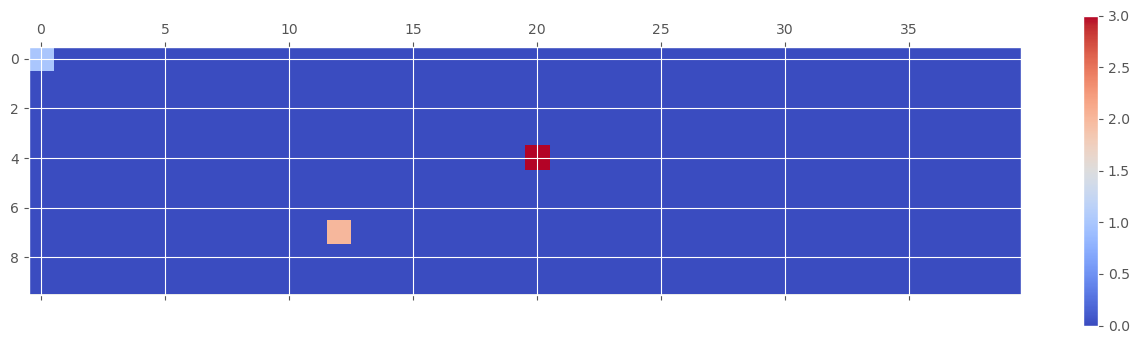

In [42]:
# step 5: map waffle chart to visual

# instantiate a new fig. obj.
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 640x480 with 0 Axes>

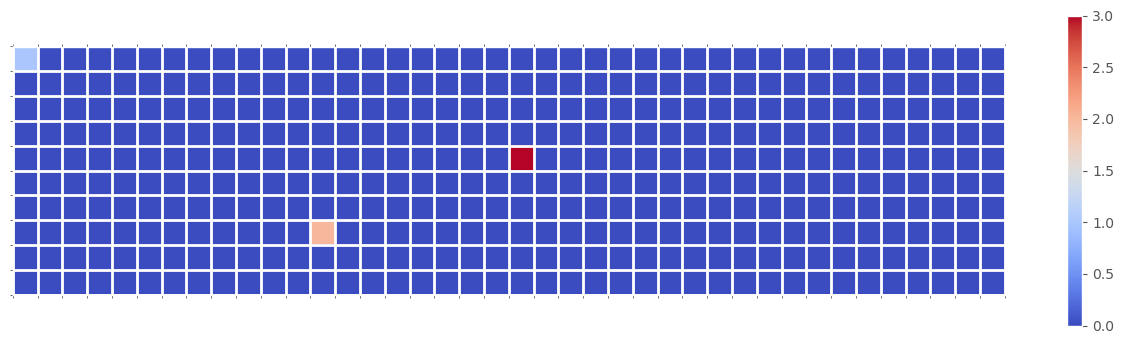

In [43]:
# step 6: percantik chart
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

/var/folders/c3/_g425yfx56z0vhzwg8_2sqj40000gn/T/ipykernel_1611/138855122.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_val = values_cumsum[len(values_cumsum) -1]
/var/folders/c3/_g425yfx56z0vhzwg8_2sqj40000gn/T/ipykernel_1611/138855122.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
/var/folders/c3/_g425yfx56z0vhzwg8_2sqj40000gn/T/ipykernel_1611/138855122.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior).

<Figure size 640x480 with 0 Axes>

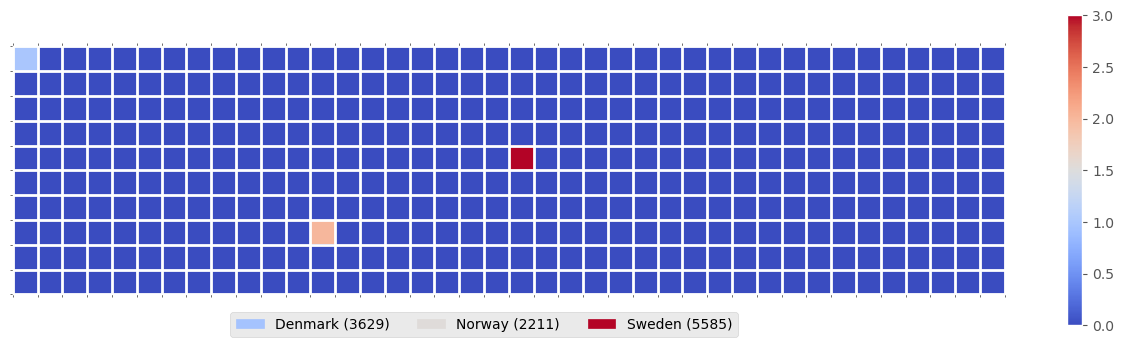

In [44]:
# step 7: add legend
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of ind. cat. to match color schemes bet. chart & leg.
values_cumsum = np.cumsum(df_dsn['Total'])
total_val = values_cumsum[len(values_cumsum) -1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_val)
    legend_handles.append(mpatches.Patch(color=color_val, 
label=label_str))
    
# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1))

                                        


these steps tidak efisien utk mengulangi ke7 langkah ini tiap kali ingin membuat waffle.

Denmark: 127
Norway: 77
Sweden: 196


/var/folders/c3/_g425yfx56z0vhzwg8_2sqj40000gn/T/ipykernel_1611/1385463756.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_val = values_cumsum[len(values_cumsum) -1]
/var/folders/c3/_g425yfx56z0vhzwg8_2sqj40000gn/T/ipykernel_1611/1385463756.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
/var/folders/c3/_g425yfx56z0vhzwg8_2sqj40000gn/T/ipykernel_1611/1385463756.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavio

<Figure size 640x480 with 0 Axes>

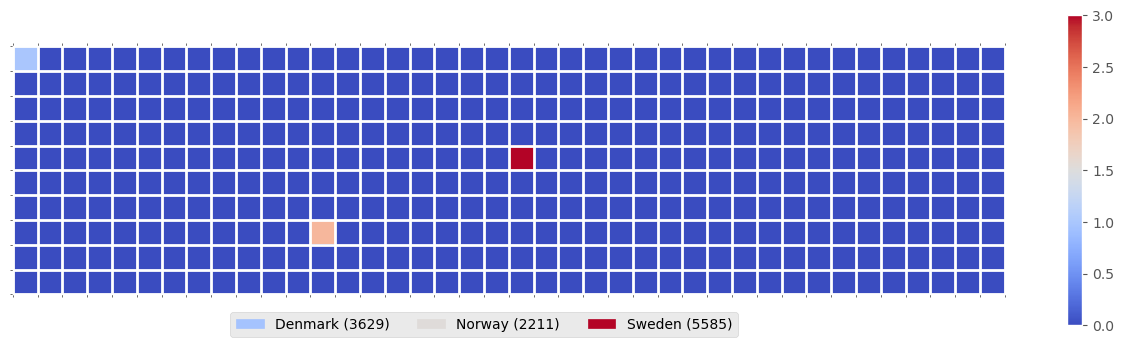

In [45]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    total_val = sum(values)
    category_proportions = [(float(value) / total_val) for value in values]

    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions] 


for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0 
tile_index = 0

#populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index +=1

        # if the num. of tiles populated for the current cat = corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ... proceed to the next category
            category_index += 1

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dsn['Total'])
total_val = values_cumsum[len(values_cumsum) -1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_val)
    legend_handles.append(mpatches.Patch(color=color_val, 
label=label_str))
    
# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1))
            



In [46]:
width = 40
height = 10

categories = df_dsn.index.values
values = df_dsn['Total']

colormap = plt.cm.coolwarm

In [47]:
create_waffle_chart(categories, values, height, width, colormap)

### Word Clouds

In [48]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [49]:
# download file 
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -0 alice_novel.txt

zsh:1: command not found: wget


In [50]:
alice_novel = open('alice_novel.txt', 'r').read()

print('File downloaded and saved!')

File downloaded and saved!


In [51]:
stopwords = set(STOPWORDS)

buat word cloud dgn menggunakan 2000 kata pertama dlm novel

In [52]:
# step 1: make wordcloud
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

alice_wc.generate(alice_novel)

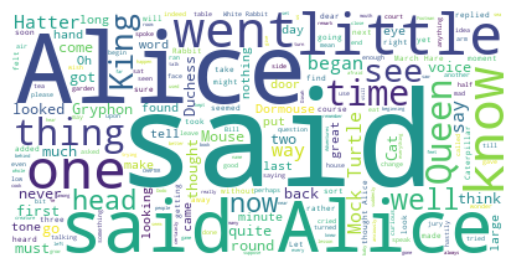

In [53]:
# step 2: visualize
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Jadi di 2000 kata pertama dlm novel, kata yg paling umum adalah Alice, said, little, went, dst. 

Mari ubah ukuran cloud sehingga bs melihat kata2 yg jarang digunakan


(-0.5, 399.5, 199.5, -0.5)

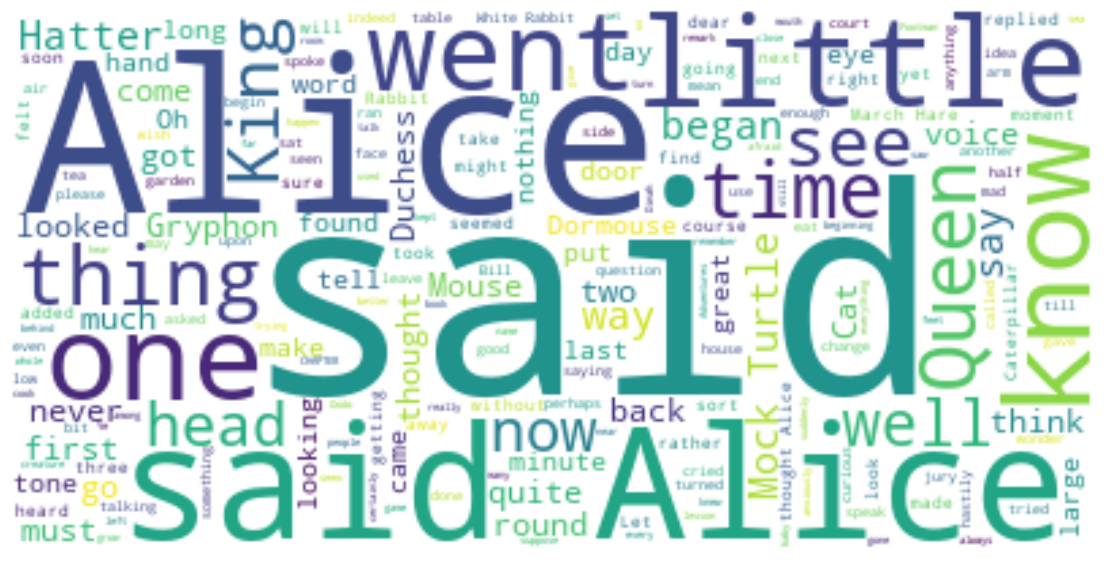

In [54]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')

much better! but, said is not an informative word, so let's add it into our stopwords and remake the cloud

(-0.5, 399.5, 199.5, -0.5)

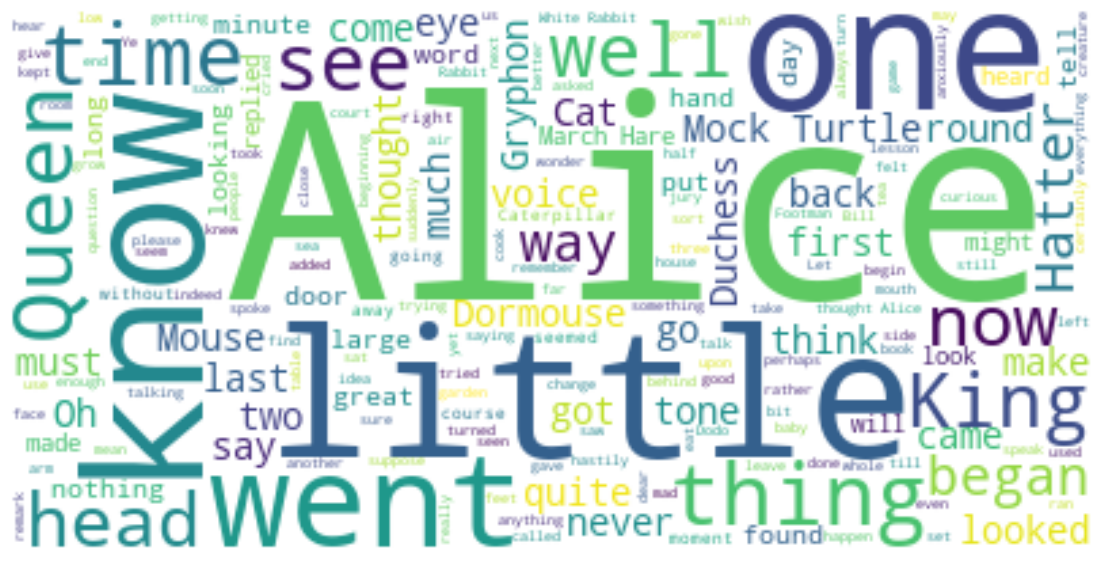

In [55]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')

In [56]:
alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


(-0.5, 899.5, 899.5, -0.5)

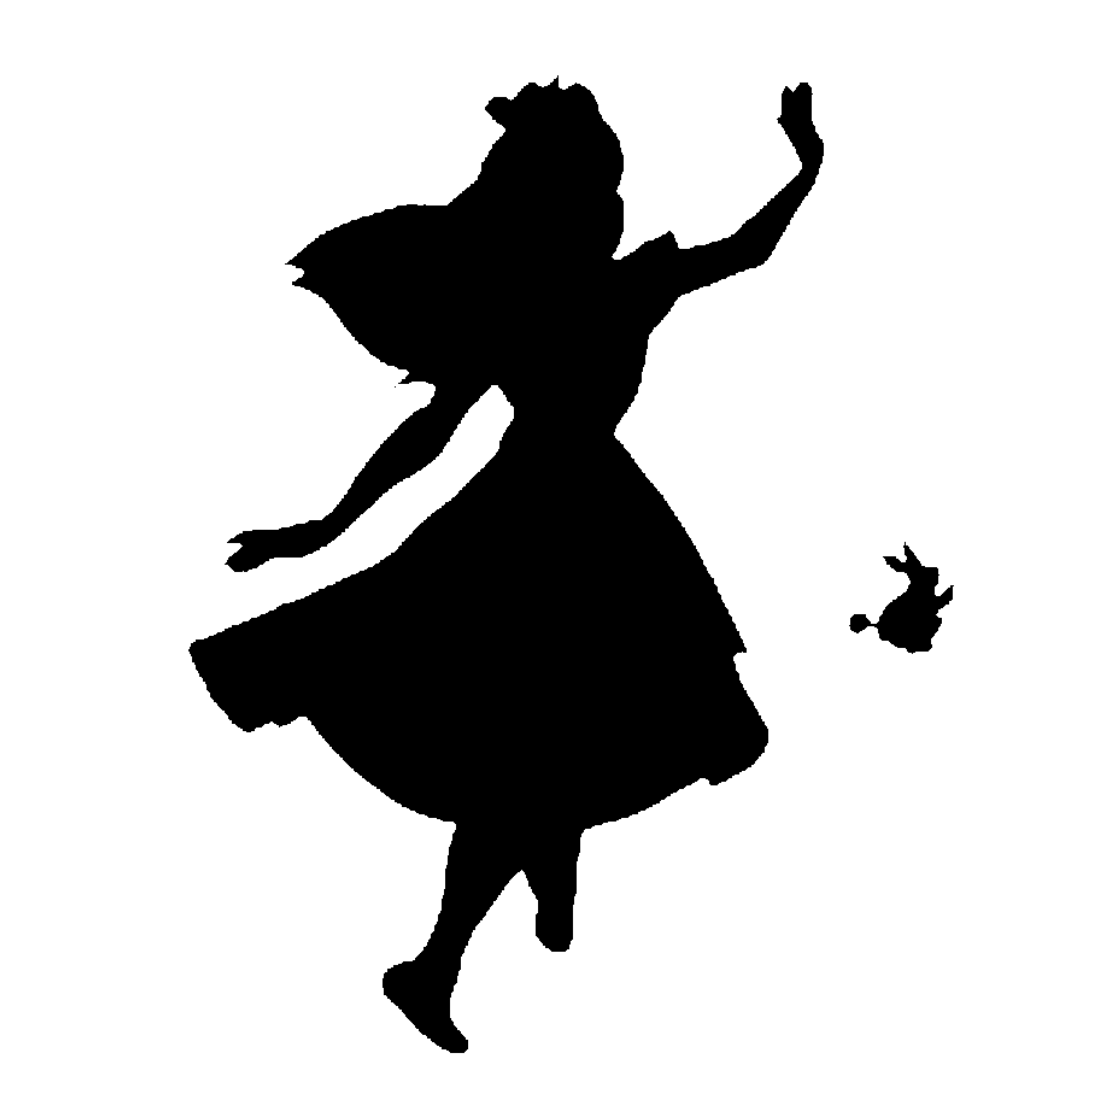

In [57]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')

(-0.5, 899.5, 899.5, -0.5)

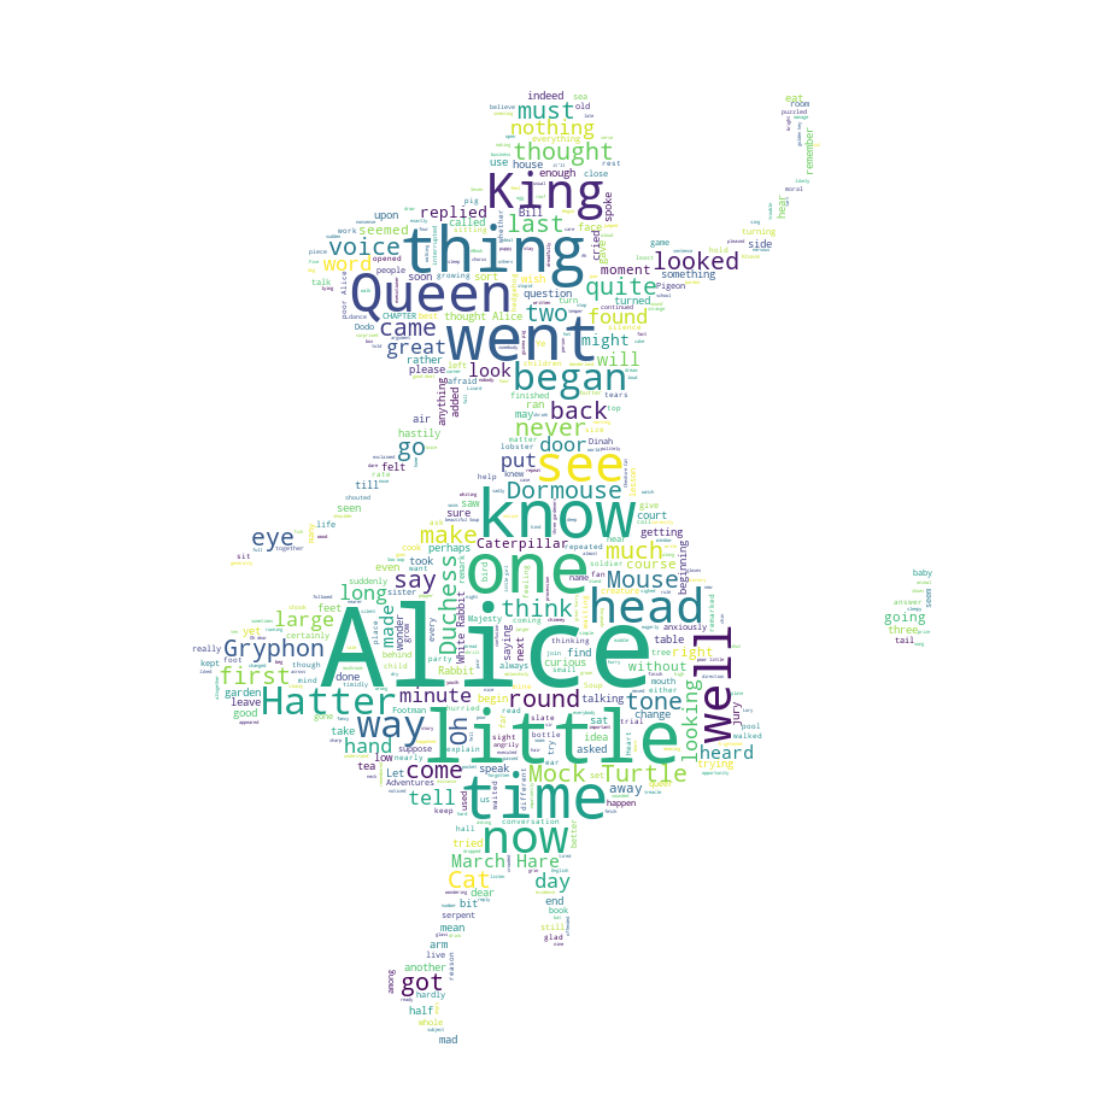

In [58]:
# step 1: make wordcloud
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    mask=alice_mask,
    stopwords=stopwords
)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')

skrg dr data imigrasi

In [59]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58623
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15698
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69359
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [60]:
total_immigration = df['Total'].sum()
total_immigration

6310016

In [61]:
max_words = 90
word_string = ''
for country in df.index.values:
    #check if country's name is a single word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Romania '

In [62]:
# step 1: create wrod cloud, no need stopwords
wordcloud = WordCloud(background_color = 'white').generate(word_string)

print('Word cloud created!')

Word cloud created!


(-0.5, 399.5, 199.5, -0.5)

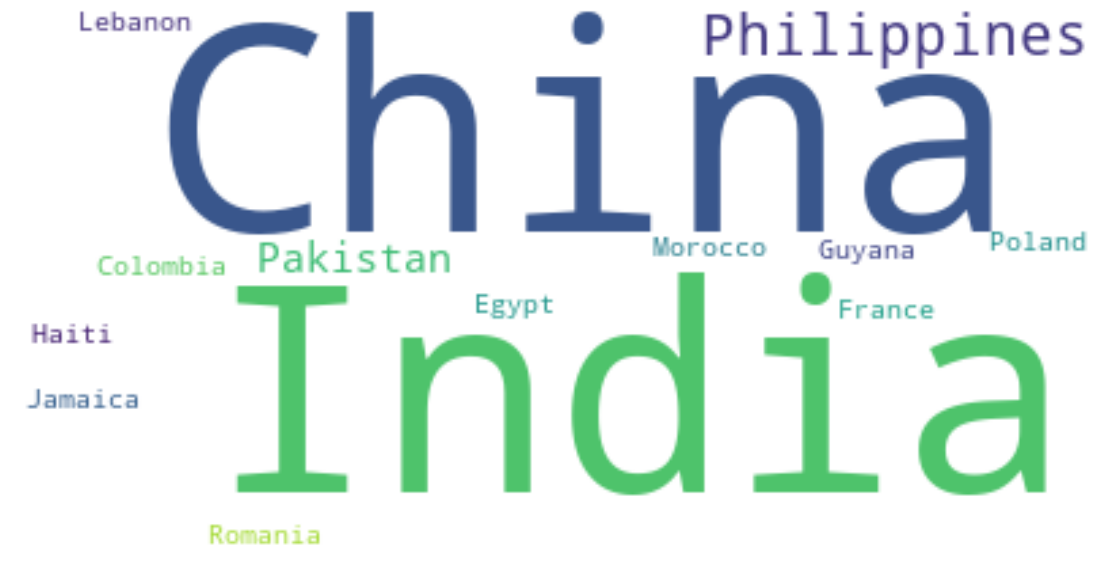

In [63]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

According to the word cloud generated, the majority of people immigrating is from one of the 15 countries displayed. 

Masking tips: download peta kanada dan lapiskan word cloud di atasnya

### Regression plots

In [65]:
# use sum() method to get the total pop. per y
df_tot = pd.DataFrame(df[years].sum(axis=0))

# change the years to type float (useful for regression)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back as a column in df_tot
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


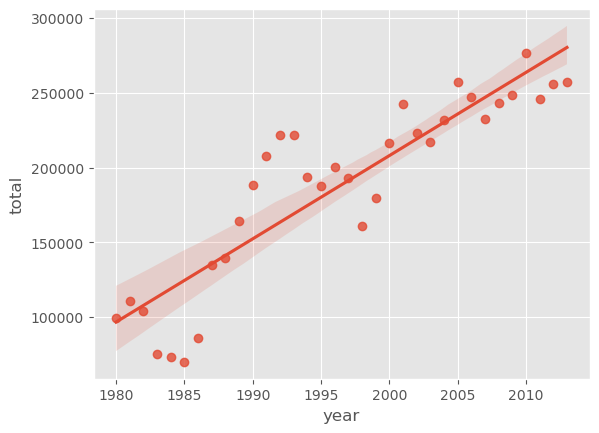

In [66]:
# create regression plot
ax = sns.regplot(x='year', y='total', data=df_tot)

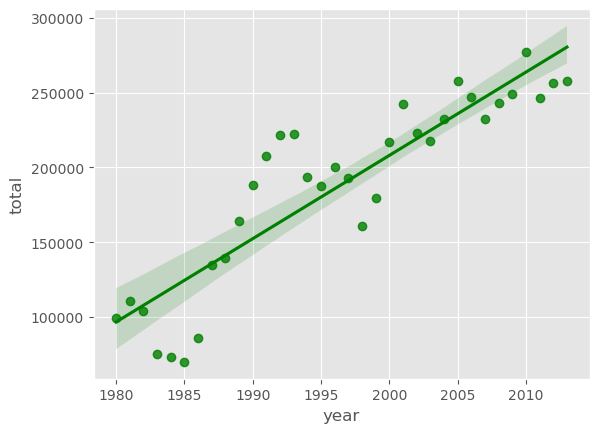

In [67]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

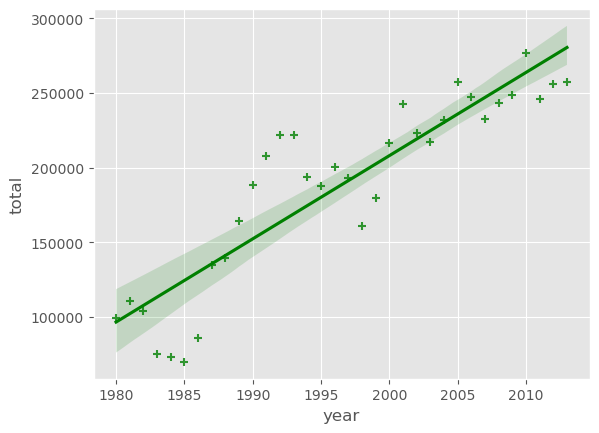

In [68]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

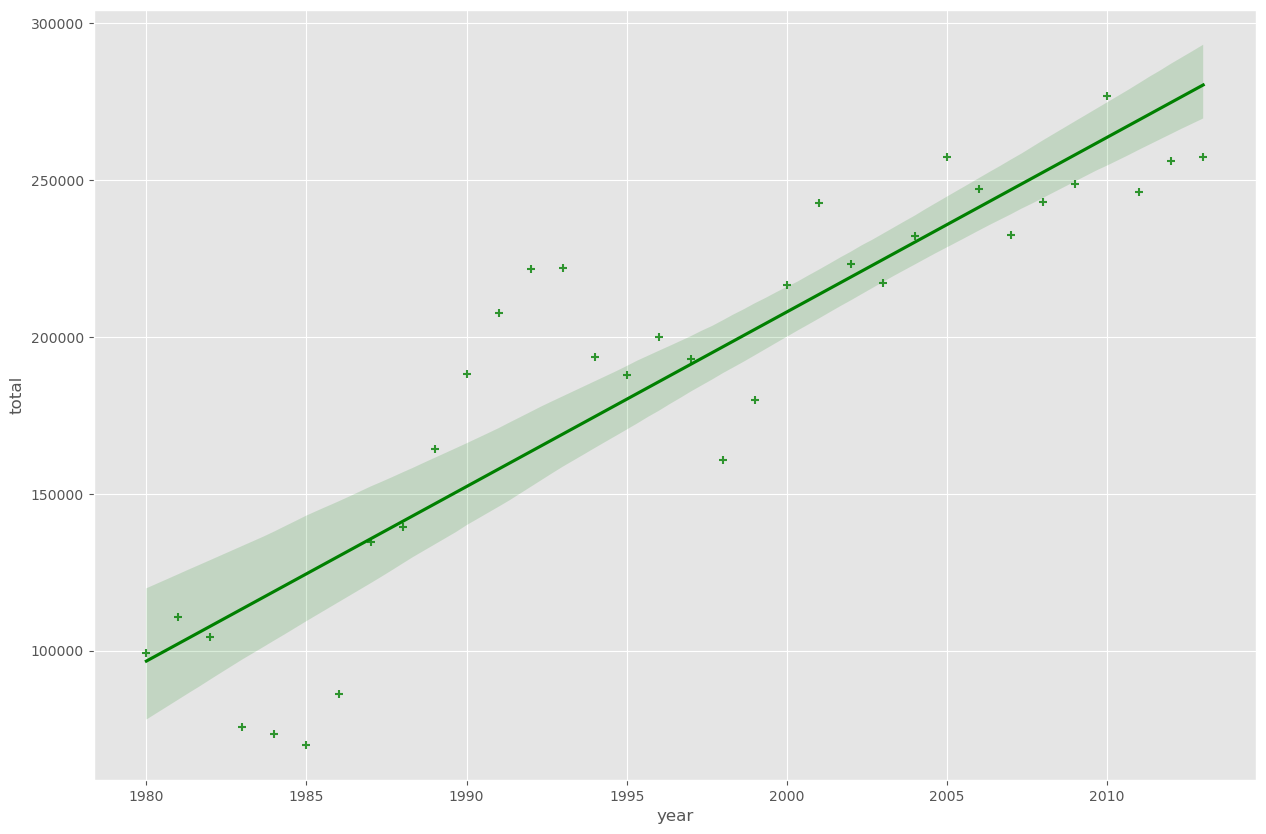

In [69]:
# perbesar plot
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

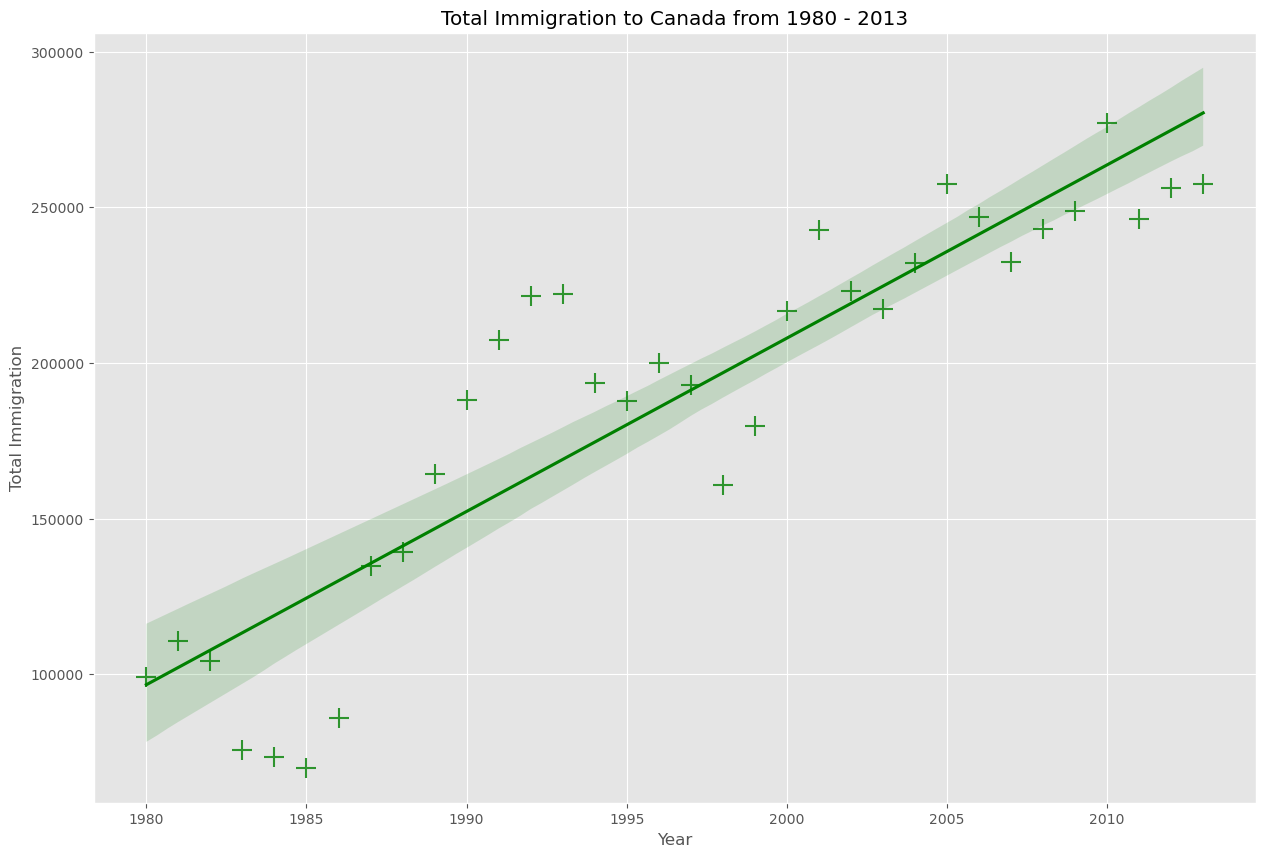

In [70]:
# perbesar marker
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

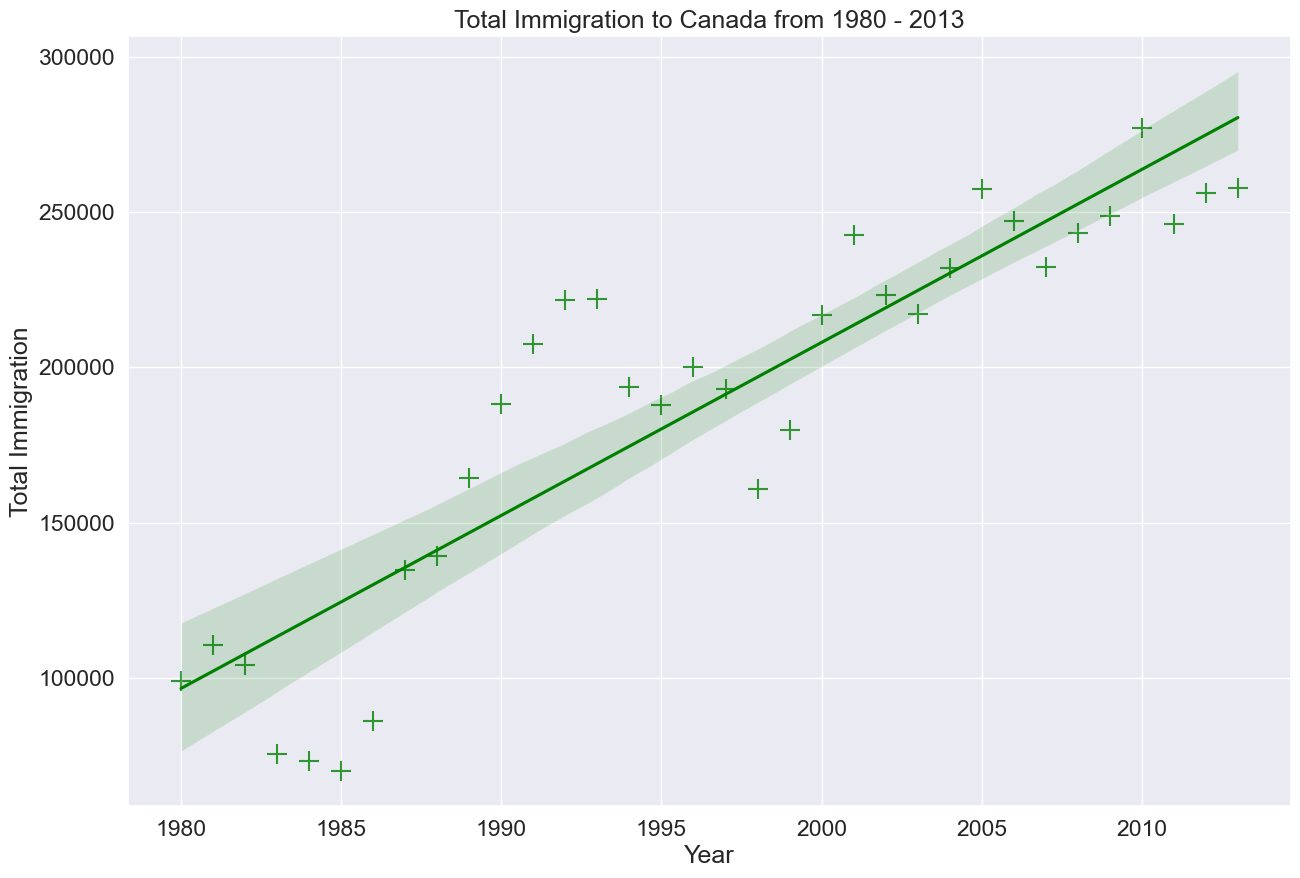

In [71]:
# increase font size
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

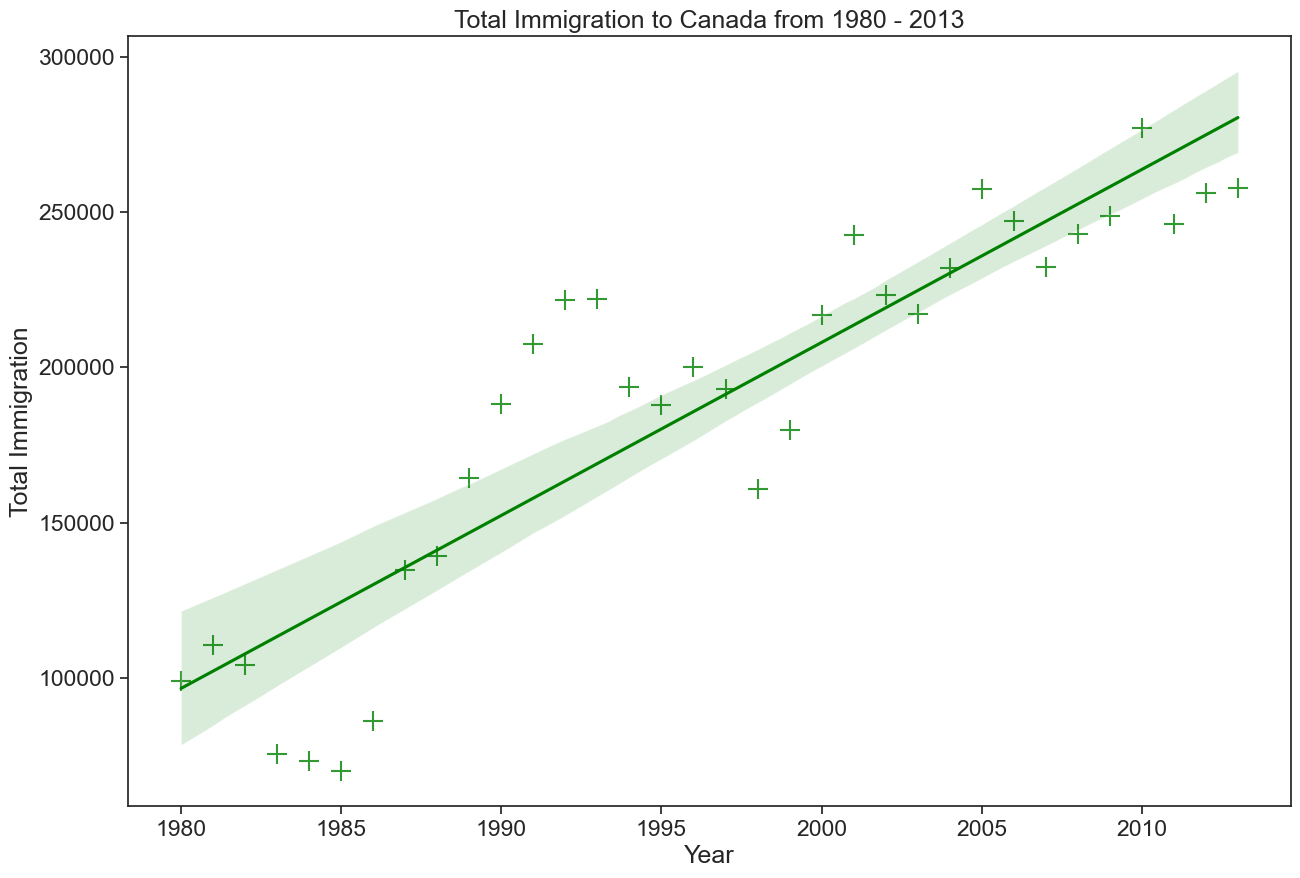

In [72]:
# change background

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

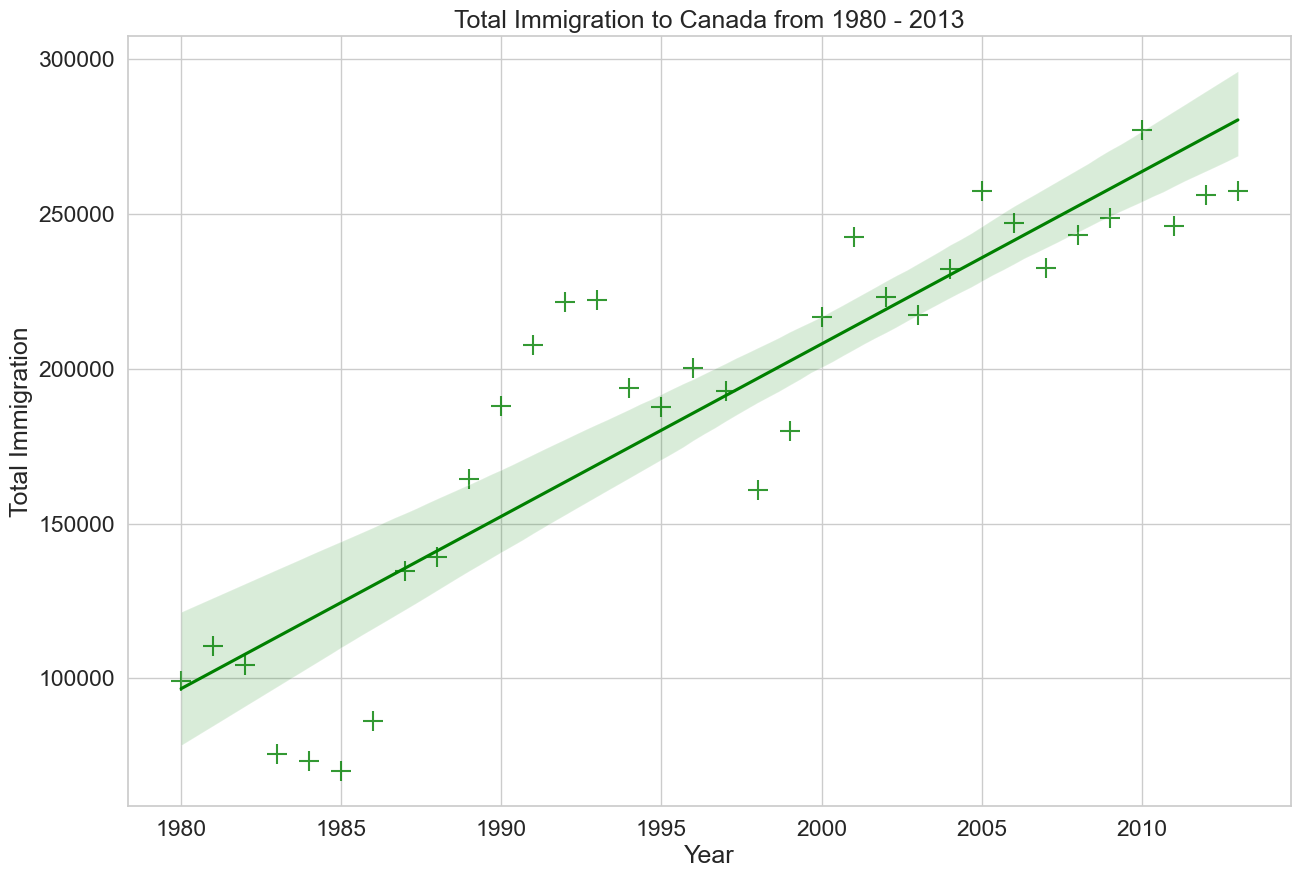

In [73]:
# tambah grid
# change background

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Contoh soal:

Use seaborn to create a scatter plot w a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013

Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden, and Norway to Canada form 1980 - 2013')

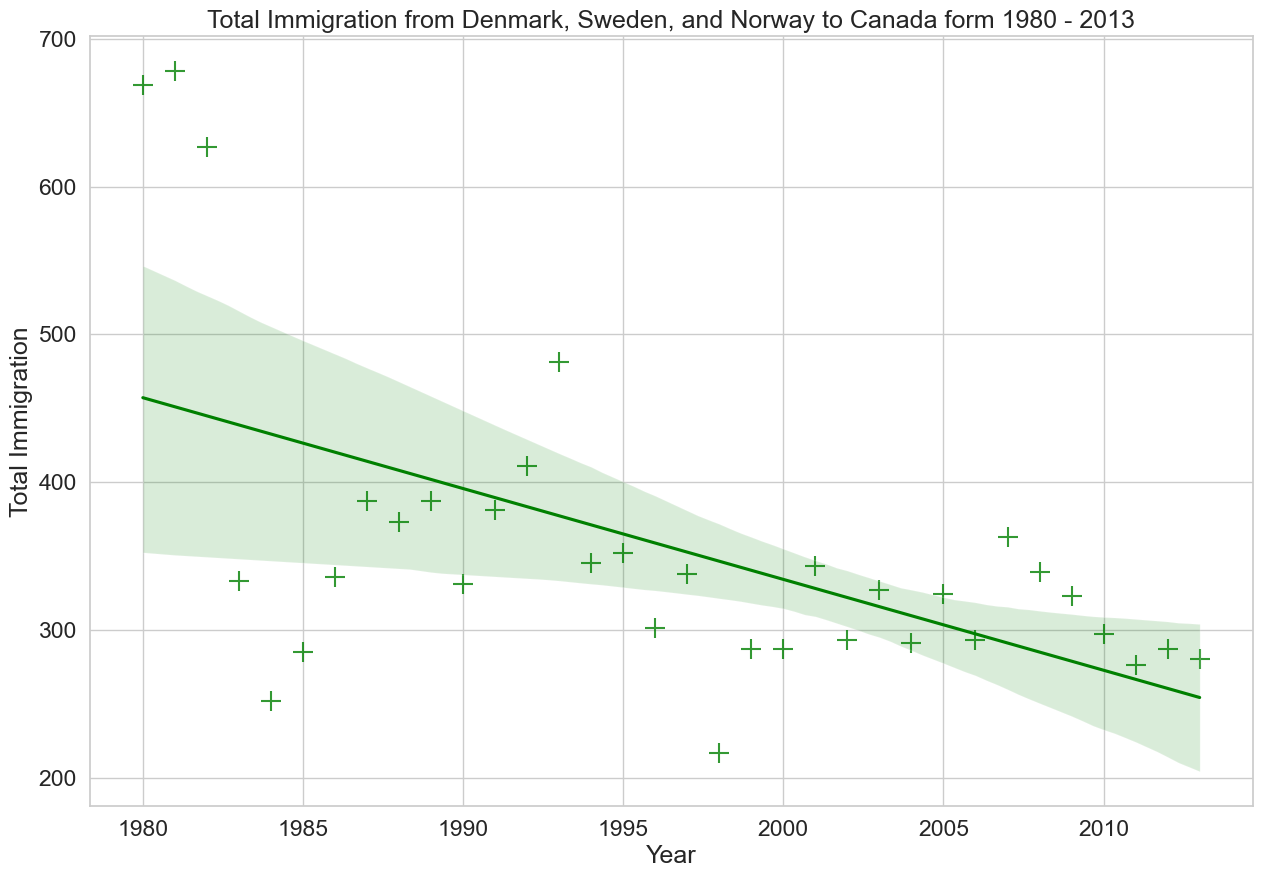

In [75]:
df_countries = df.loc[['Denmark', 'Norway', 'Sweden'], years].T

# create df_total by summing across 3 countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from str to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# define figure size
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada form 1980 - 2013')

In [77]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58623
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15698
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69359
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [78]:
df_total = pd.DataFrame(df_countries.sum(axis=1))

df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58623
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15698
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69359
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [79]:
df_total.reset_index(inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58623
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15698
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69359
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [80]:
df_total.columns = ['year', 'total']
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58623
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15698
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69359
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
